In [1]:
# Add the line below so that plots will appear inline in the notebook.
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy  as np
#import nibabel as nib

import struct

import os
import sys
import shutil
import sirf.STIR as pet

## Read in the data

In [2]:
def combine_datafiles(basedir,startfile,nfiles,outfile):
    """Read data files containing reconstructed coordinates and combine them into a single file.
    """

    a_event_ids = []

    a_true_r1 = []
    a_true_phi1 = []
    a_true_z1 = []
    a_true_t1 = []
    a_true_r2 = []
    a_true_phi2 = []
    a_true_z2 = []
    a_true_t2 = []

    a_reco_r1 = []
    a_reco_phi1 = []
    a_reco_z1 = []
    a_reco_r2 = []
    a_reco_phi2 = []
    a_reco_z2 = []

    for ii in range(nfiles):

        fnum = startfile+ii
        if(fnum < 10):
            fnum = "00{}".format(fnum)
        elif(fnum < 100):
            fnum = "0{}".format(fnum)

        fname = "{}/phantom_2dslice_true_coincidences_pos_reco_{}_true.npz".format(basedir,fnum)
        if(os.path.isfile(fname)):

            print("Adding file {}...".format(fname))

            fn = np.load(fname)

            if(len(a_event_ids) > 0): a_event_ids = np.concatenate((a_event_ids,fn['a_event_ids']))
            else: a_event_ids = fn['a_event_ids']

            if(len(a_true_r1) > 0): a_true_r1 = np.concatenate((a_true_r1,fn['a_true_r1']))
            else: a_true_r1 = fn['a_true_r1']

            if(len(a_true_phi1) > 0): a_true_phi1 = np.concatenate((a_true_phi1,fn['a_true_phi1']))
            else: a_true_phi1 = fn['a_true_phi1']

            if(len(a_true_z1) > 0): a_true_z1 = np.concatenate((a_true_z1,fn['a_true_z1']))
            else: a_true_z1 = fn['a_true_z1']
                
            if(len(a_true_t1) > 0): a_true_t1 = np.concatenate((a_true_t1,fn['a_true_t1']))
            else: a_true_t1 = fn['a_true_t1']

            if(len(a_true_r2) > 0): a_true_r2 = np.concatenate((a_true_r2,fn['a_true_r2']))
            else: a_true_r2 = fn['a_true_r2']

            if(len(a_true_phi2) > 0): a_true_phi2 = np.concatenate((a_true_phi2,fn['a_true_phi2']))
            else: a_true_phi2 = fn['a_true_phi2']

            if(len(a_true_z2) > 0): a_true_z2 = np.concatenate((a_true_z2,fn['a_true_z2']))
            else: a_true_z2 = fn['a_true_z2']
                
            if(len(a_true_t2) > 0): a_true_t2 = np.concatenate((a_true_t2,fn['a_true_t2']))
            else: a_true_t2 = fn['a_true_t2']

            if(len(a_reco_r1) > 0): a_reco_r1 = np.concatenate((a_reco_r1,fn['a_reco_r1']))
            else: a_reco_r1 = fn['a_reco_r1']

            if(len(a_reco_phi1) > 0): a_reco_phi1 = np.concatenate((a_reco_phi1,fn['a_reco_phi1']))
            else: a_reco_phi1 = fn['a_reco_phi1']

            if(len(a_reco_z1) > 0): a_reco_z1 = np.concatenate((a_reco_z1,fn['a_reco_z1']))
            else: a_reco_z1 = fn['a_reco_z1']

            if(len(a_reco_r2) > 0): a_reco_r2 = np.concatenate((a_reco_r2,fn['a_reco_r2']))
            else: a_reco_r2 = fn['a_reco_r2']

            if(len(a_reco_phi2) > 0): a_reco_phi2 = np.concatenate((a_reco_phi2,fn['a_reco_phi2']))
            else: a_reco_phi2 = fn['a_reco_phi2']

            if(len(a_reco_z2) > 0): a_reco_z2 = np.concatenate((a_reco_z2,fn['a_reco_z2']))
            else: a_reco_z2 = fn['a_reco_z2']

        else:

            print("Skipping file {}...".format(fname))

        # Write a single file.
        np.savez(outfile, a_event_ids=a_event_ids,
                          a_true_r1=a_true_r1,a_true_phi1=a_true_phi1,a_true_z1=a_true_z1,a_true_t1=a_true_t1,
                          a_true_r2=a_true_r2,a_true_phi2=a_true_phi2,a_true_z2=a_true_z2,
                          a_reco_r1=a_reco_r1,a_reco_phi1=a_reco_phi1,a_reco_z1=a_reco_z1,a_true_t2=a_true_t2,
                          a_reco_r2=a_reco_r2,a_reco_phi2=a_reco_phi2,a_reco_z2=a_reco_z2)
        
def read_datafile(infile):

    fn = np.load(infile)

    a_event_ids = fn['a_event_ids']

    a_true_r1   = fn['a_true_r1']
    a_true_phi1 = fn['a_true_phi1']
    a_true_z1   = fn['a_true_z1']
    a_true_t1   = fn['a_true_t1']
    a_true_r2   = fn['a_true_r2']
    a_true_phi2 = fn['a_true_phi2']
    a_true_z2   = fn['a_true_z2']
    a_true_t2   = fn['a_true_t2']

    a_reco_r1   = fn['a_reco_r1']
    a_reco_phi1 = fn['a_reco_phi1']
    a_reco_z1   = fn['a_reco_z1']
    a_reco_r2   = fn['a_reco_r2']
    a_reco_phi2 = fn['a_reco_phi2']
    a_reco_z2   = fn['a_reco_z2']

    return (a_event_ids, a_true_r1, a_true_phi1, a_true_z1, a_true_t1,
                       a_true_r2, a_true_phi2, a_true_z2, a_true_t2,
                       a_reco_r1, a_reco_phi1, a_reco_z1,
                       a_reco_r2, a_reco_phi2, a_reco_z2)

In [3]:
# Combine the data files if necessary.
outfile = '/home/jrenner/analysis/petalo/MC/phantom_2dslice/phantom_2dslice_all.npz'
if(not os.path.exists(outfile)):
    combine_datafiles('/home/jrenner/analysis/petalo/MC/phantom_2dslice', 0, 30, outfile)

In [4]:
# Read in the LORs
(D_evt,D_true_r1,D_true_phi1,D_true_z1,D_true_t1,
 D_true_r2,D_true_phi2,D_true_z2,D_true_t2,
 D_reco_r1,D_reco_phi1,D_reco_z1,
 D_reco_r2,D_reco_phi2,D_reco_z2) = read_datafile(outfile)
print("Read {} coincidences".format(len(D_evt)))

Read 3099379 coincidences


Text(0.5,0,'TOF (ns)')

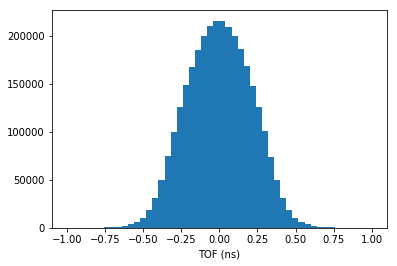

In [5]:
TOF = np.array(D_true_t2) - np.array(D_true_t1)
plt.hist(TOF[(TOF < 1) & (TOF > -1)],bins=50)
plt.xlabel("TOF (ns)")

## Compute sinograms

In [6]:
def compute_TOF_sinograms_hist(N_phi,size_u,N_u,size_v,N_v,size_TOF,N_TOF,LORs,theta_tol=np.pi/6):
    """ Compute the TOF sinograms.

        - LORs: the lines of response, stored in (r1,phi1,z1), (r2,phi2,z2) pairs as arrays: D_r1, D_phi1, D_z1, D_r2, D_phi2, D_z2
        - cos_tol: the tolerance for a LOR to be included in the projection for a given plane.  If the line of response makes
            an angle theta with the normal of the plane such that |cos(theta) - 1| < cos_tol, it is included in the projection.

    """    
    # Get the data vectors from the LORs.
    D_r1, D_phi1, D_z1, D_t1, D_r2, D_phi2, D_z2, D_t2 = LORs
    
    proj_matrix = np.zeros([N_TOF,N_v,N_phi,N_u])
    
    binsize_phi = np.pi/N_phi
    binsize_u = size_u/N_u
    binsize_v = size_v/N_v
    binsize_TOF = size_TOF/N_TOF

    half_u = size_u/2.0
    half_v = size_v/2.0
    half_TOF = size_TOF/2.0
    
    for r1,phi1,z1,t1,r2,phi2,z2,t2 in zip(D_r1,D_phi1,D_z1,D_t1,D_r2,D_phi2,D_z2,D_t2):

        x1 = r1*np.cos(phi1)
        y1 = r1*np.sin(phi1)
        x2 = r2*np.cos(phi2)
        y2 = r2*np.sin(phi2)
        tof = t1-t2

        lx = x2-x1; ly = y2-y1; lz = z2-z1                               # line vector: l = p2 - p1
        lr = (lx**2 + ly**2)**0.5
        phi = np.arctan2(ly,lx)
        theta = np.arctan2(lz,lr)
        
        if(phi < 0): 
            phi += np.pi
            tof *= -1
        
        if(abs(theta) < theta_tol):
            
            # Compute the normal vector for this plane.
            sin_phi = np.sin(phi); cos_phi = np.cos(phi)
            sin_theta = np.sin(theta); cos_theta = np.cos(theta)
            nx = cos_theta*cos_phi; ny = cos_theta*sin_phi; nz = sin_theta

            iparam = (x1*nx + y1*ny + z1*nz)/(lx*nx + ly*ny + lz*nz)         # intersection parameter
            xuv = x1 - lx*iparam; yuv = y1 - ly*iparam; zuv = z1 - lz*iparam # intersection point

            # Compute (u,v).
            u = xuv*sin_phi - yuv*cos_phi
            v = -xuv*sin_theta*cos_phi - yuv*sin_theta*sin_phi + zuv*cos_theta
            
            # Bin (u,v), phi, and TOF, and add to the projection.
            bu = int((u + half_u)/binsize_u)
            bv = int((v + half_v)/binsize_v)
            bphi = int((np.pi - phi)/binsize_phi)
            bTOF = int((tof + half_TOF)/binsize_TOF)
            if(bu >= 0 and bu < N_u and bv >= 0 and bv < N_v and bTOF >= 0 and bTOF < N_TOF):
                proj_matrix[bTOF,bv,bphi,bu] += 1
    
    return proj_matrix

In [7]:
# Set up the binning.
N_axial = 64
N_u = 155
N_v = 1
size_u = 155
size_v = 1
size_TOF = 2.0 # total span of TOF bins in ns
N_TOF = 13

In [8]:
# Compute the sinograms
LORs = (D_true_r1,D_true_phi1,D_true_z1,D_true_t1,D_true_r2,D_true_phi2,D_true_z2,D_true_t2)
sinograms = compute_TOF_sinograms_hist(N_axial,size_u,N_u,size_v,N_v,size_TOF,N_TOF,LORs,theta_tol=0.05*np.pi)

308942.0


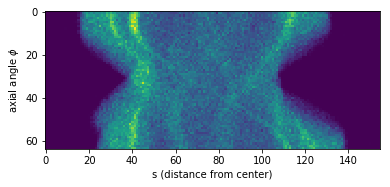

In [10]:
# Show the set of sinograms, summed over TOF.
plt.imshow(np.sum(sinograms[:,0,:,:],axis=0))
plt.xlabel("s (distance from center)")
plt.ylabel("axial angle $\phi$")
print(np.sum(sinograms))

## Perform the reconstruction (some code from SIRF exercise notebooks)

In [17]:
use_TOF = False

In [18]:
if(use_TOF): 
    data = sinograms
else:
    # Sum over all TOF bins.
    data = np.sum(sinograms,axis=0).reshape([1,sinograms.shape[1],sinograms.shape[2],sinograms.shape[3]])

In [19]:
if(use_TOF): 
    templ = pet.AcquisitionData('template_sinogram_PETALO.hs')
else:
    templ = pet.AcquisitionData('template_sinogram_PETALO_noTOF.hs')
    
# Load the data into the AcquisitionData object.
daq = templ.get_uniform_copy(data)

# Check that the dimensions are correct.
acquisition_array = daq.as_array()
print(acquisition_array.shape)

(1, 1, 64, 155)


In [20]:
# Perform the reconstruction.
obj_fun = pet.make_Poisson_loglikelihood(daq)
recon = pet.OSMAPOSLReconstructor()
recon.set_objective_function(obj_fun)
recon.set_num_subsets(4)
num_iters=10
recon.set_num_subiterations(num_iters)

# create initial image estimate of dimensions and voxel sizes
# compatible with the scanner geometry (included in the AcquisitionData
# object acq_data) and initialize each voxel to 1.0
nxny = (155, 155)
initial_image = daq.create_uniform_image(1.0, nxny)
recon.set_up(initial_image)

# set the initial image estimate
recon.set_current_estimate(initial_image)
# reconstruct
recon.process()
# show reconstructed image
image_array = recon.get_current_estimate().as_array()
print(image_array.shape)

(1, 155, 155)


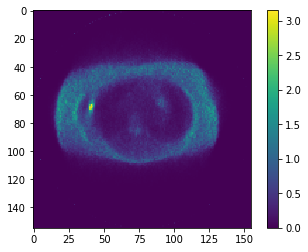

In [21]:
plt.imshow(image_array[0,:,:])
plt.colorbar()

In [22]:
# Store the image for making the final plot (note this needs to be run once with TOF and once without)
if(use_TOF):
    img_TOF = image_array
else:
    img_noTOF = image_array

In [23]:
# Get the original simulated image.
image = pet.ImageData('emission.hv')
img_original = image.as_array().reshape([155,155,1])

Text(0.5,1,'PETALO true MC, TOF (200 ps resolution)')

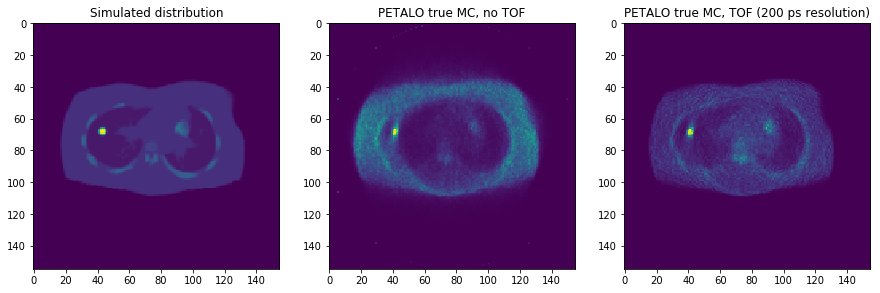

In [24]:
fig = plt.figure()
fig.set_figheight(4.8)
fig.set_figwidth(15.0)

ax1 = fig.add_subplot(131) 
plt.imshow(img_original[:,:,0])
plt.title("Simulated distribution")

ax2 = fig.add_subplot(132)
plt.imshow(img_noTOF[0,:,:])
plt.title("PETALO true MC, no TOF")

ax3 = fig.add_subplot(133)
plt.imshow(img_TOF[0,:,:])
plt.title("PETALO true MC, TOF (200 ps resolution)")